# Pré-processamento dos dados e RL com Python

Para este HandsOn vamos usar o [Data Set do Titanic disponível no Kaggle](https://www.kaggle.com/c/titanic). Este é um conjunto de dados muito famoso! 

Vamos tentar prever uma classificação de sobreviventes e não sobreviventes utilizando a implementação da Regressão Logística em Python para classificação. Mas antes disso vamos aplicar o processo de pré-processamento dos dados.

Este data set já está parcialmente pré-processado, mas se quiser usar o conjunto de dados original, hospedado diretamente no Kaggle, será um desafio interessante =D.

## O Dicionário de Dados

**Survival**: Sobrevivente (Não=0,Sim=1)

**Pclass**: Classe de ingresso (1=1st,2=2nd,3=3rd)

**Sex**: Sexo

**Age**: Idade em anos

**Sibsp**: Quantidade de irmãos ou cônjuge a bordo do Titanic

**Parch**: Quantidade de pais ou filhos a bordo do Titanic

**Ticket**: Número do ticket

**Fare**: Tarifa do passageiro

**Cabin**: Número da cabine	

**Embarked**: Portão de Embarque (C=Cherbourg, Q=Queenstown, S=Southampton)



## Import as bibliotecas
Vamos importar algumas bibliotecas para começar!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Acessando os dados =D 

**Atividade:** Vamos iniciar lendo os dados através do pandas

- Utilize a função **pd.read_csv** para ler o dado e salve na variável **train**
- O nome do dataset é **titanic_train.csv**
- Visualize alguns elementos do seu data set, para isto use **train.head()**


# Feature engineering e exploração dos dados

Vamos verificar verificar os dados que faltam!

## Análise de atributos ausentes

Podemos usar o seaborn para criar um mapa de calor simples para ver onde faltam dados!

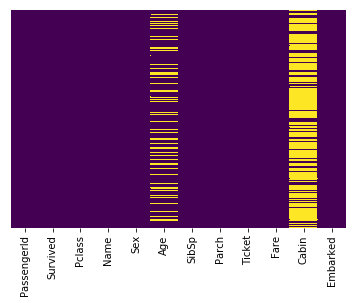

In [5]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

Aproximadamente 20% dos dados correspondentes ao atributo Idade estão faltando. A proporção de Idade que falta é pequena o suficiente para inferirmos de alguma forma. Já a coluna Cabin, há muitos dados ausentes para fazermos algo útil com um nível básico *PS: Pode-se inferir esse valor com base no preço do ingresso e/ou portão de entrada, ...].*

## Atividade
* Plot os dados no countplot com a informação do SibSp

* Plot os dados no countplot com a informação do Sex (veja a dica)

* Plot os dados no countplot com a informação do Pclass (veja a dica)
* *PS.:  Veja o exemplo abaixo*

Quais insights você consegue observar a partir destes novos gráficos?

(Dica: use o parâmetro hue)

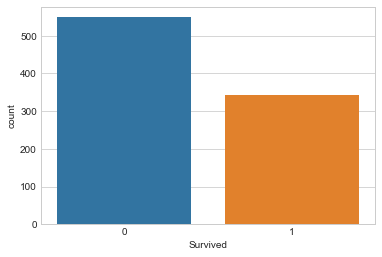

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

## Atividade
* Construa um histograma considerando as informações contidas no Fare

Quais insights você consegue observar a partir destes gráficos?

(Dica: veja o exemplo acima)

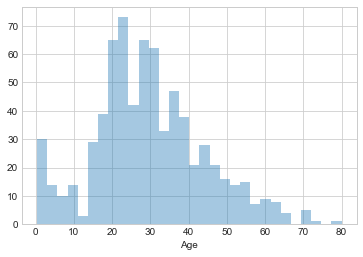

In [30]:
sns.distplot(train['Age'].dropna(),kde=False, bins=30)

___
## Data Cleaning

Queremos preencher os dados que faltam em algumas amostras para o atributo Idade. Uma maneira de fazer isso é preencher com o valor da idade média de todos os passageiros. O que vocês acham? Há outra forma melhor de fazer? Vejam abaixo um exemplo de um box plot gráfico 

- para visualizar detalhes de uma coluna você pode usar **dataframe['coluna'].describe()**
- para recuperar a média você pode utilizar a função **mean** sobre a coluna
- *P.S.:* se você tem outro *approach* para preencher a coluna **Age** você criar uma função que retorne um valor para este valor, e posteriormente aplicar **df['column'] = df[['column']].apply(function, axis=1)**

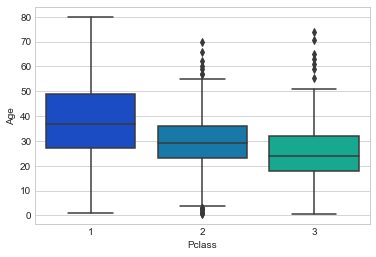

In [26]:
#plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

# Atividade

- Qual insight você tem a partir desse gráfico?
- Vamos fazer o input da coluna Age =D!?
- Crie um novo mapa de calor
   
<!--
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)
-->

Ótimo! Vamos em frente ...

# Atividade

* Elimine o atributo Cabin do nosso DataSet
* Visualize os primeiros elementos do DF **train** sem o atributo cabine
* Há ainda algum valor nulo? Vamos eliminá-lo! Para fazer isto use df.dropna(inplace=True)

(Dica: use a função drop, por exemplo, df.drop('coluna',axis=1,inplace=True))

<!--
train.drop('Cabin',axis=1,inplace=True)
--->


## Feature transformation

Precisamos converter atributos categóricos em variáveis numéricas usando pandas, a função **get_dummies** aplica o labelEncoding e OneHotEncoding!
Caso contrário, nosso algoritmo de ML não será apto para trabalhar com recursos diretamente categóricos como entradas.

# Atividade

* Veja o exemplo abaixo e refaça o mesmo processo para o atributo **Embarked**
* Visualize como os seus dados estão ficando

*PS: vc pode usar a função info() para visualizar informações do seu dataFrame*


In [59]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [55]:
train.drop(['Sex'],axis=1,inplace=True)

In [57]:
train = pd.concat([train,sex],axis=1)

# Atividade

* Algum candidato para explicar o que o código acima fez?
* Por quê não foram adicionadas as colunas "Female" e "C"?
* Remova as colunas Name e Ticket.

Ótimo Trabalho! Nossos dados estão prontos já estão prontos para o nosso modelo? Alguma sugestão de mais transformações?


# Construindo o modelo de Regressão Logística

Vamos começar dividindo nossos dados em um conjunto de treinamento e conjunto de testes (há outro arquivo test.csv, caso você queira usar todos do treino para construção do seu modelo).


## Divisão Test-Train

In [16]:
from scipy.misc import comb
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Treinando e Classificando

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
predictions = logmodel.predict(X_test)

Vamos avaliar o nosso modelo e validar se ele atende as nossas KPI´s!

## Avaliação

Podemos verificar a precisão, o recall, o f1-score usando o relatório de classificação!

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.88      0.82       154
          1       0.79      0.64      0.71       114

avg / total       0.78      0.78      0.77       268



Podemos verificar a matriz de confusão e extraírmos outras métricas

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_test, predictions)

array([[135,  19],
       [ 41,  73]], dtype=int64)

## Atividades de casa ou não =D

- Aplique o wrapper method (foward propagation) e análise como as métricas se comportaram
- Qual feature foi a mais importante? E qual a mais irrelevante?
- Que tal brincar com os hiperparametros e/ou fazer mais feature engineering?
- Você e seu colega sobreviveriam ao naufrágio do Titanic?
- Refaça o treinamento do modelo com todo o dataset train
- Crie um pipeline para o pré-processamento de features
- Aplique o pipeline sobre o dataset de titanic_test.csv e aplique 
- Que tal analisar uma nova solução candidata, por exemplo, Árvore de Decisão e fazer um benchmark ;)

Data Science é o que há =D! 

Você pode querer explorar outras formas pré-processamento de dados ... fique a vontade =D!

<!--
* Normalização sobre as tarifas
* Crie uma feature categorica com base na idade da pessoa
* Aplique uma média considerando a primeira letra do bilhete 
* Talvez a cabine possa ser uma característica ... E se a cabine puder ser inferida? Como funcionava a divisão de cabines por classes ou idades ...
* Existe alguma informação que você pode obter a partir do bilhete? Uma média 

-->

## Great Job!